# 异常检测-基于统计学的方法

## 1.概述
1. 假设：假定正常的数据遵从一个统计模型，不遵守该统计模型的数据为异常点
2. 方法
  1. 参数方法：假设统计模型参数为$\theta$，概率密度函数为$f(x,\theta)$
  2. 非参数方法：不假定先验统计模型，非参数方法通常假定参数的个数和性质都是灵活的

## 2.参数方法
- 一元情况：假定分布为正态分布
- 多元情况：
  - 特征独立：则对每一个维度分别考虑「一元情况」
  - 特征相关：多元高斯分布

- 混合参数分布：
  >在许多情况下假定数据是由正态分布产生的。当实际数据很复杂时，这种假定过于简单，可以假定数据是被混合参数分布产生的。
  例如：高斯混合分布 GMM

## 3.非参数方法

**例：使用直方图检测异常点**
1. 构造直方图：使用输入数据构造一个直方图，用户提供直方图的相关参数（直方图类型，直方图箱数，直方图箱型等）
2. 检测异常点：
  - 简单情况：如果该对象落入直方图的一个箱中，则认为是正常，否则认为是异常
  - 复杂情况：使用直方图赋予每个对象一个异常点得分

直方图检测的问题：很难选择一个合适的箱尺寸
- 箱尺寸太大：许多正常对象都会落入空/稀疏的箱中 => 误判为异常点
- 箱尺寸太小：异常点对象深入某些箱中 => 误判为正常点

## 4.HBOS
1. Histogram-based Outlier Score
2. 特点
  - 单变量组合方法，无法建模特征之间的依赖关系
  - 计算速度快，对大数据集友好
  - 基本假设：每个维度相互独立 => 对每个维度进行bin划分，bin的密度越高，异常评分越低
3. 算法流程
  1. 为每个维度做出数据直方图
    - 静态宽度直方图：宽度固定，在值范围内使用k格等宽箱，样本落入每个桶的频率（相对数量）作为密度（箱子高度）的估计，时间复杂度：$O(n)$
    - 动态宽度直方图：排序，然后将**固定数量的$\frac{N}{k}$个连续值装入一个箱中**，N为样本总数，K为箱个数。箱面积表示实例数，箱的宽度由箱中第一个值和最后一个值所决定。所有箱的面积是一样的. => 跨度大的箱子高度低，密度小 => 例外情况：超过k个数相等，相等的值放入同一个箱子中，此时允许在同一个箱里超过$N/k$个值，时间复杂度$O(n \times log(n))$

  2. 为每个维度都计算一个独立的直方图，其中每个箱子的高度表示密度的估计。为了使最大高度为1（确保每个特征与异常值得分的权重相等），对直方图进行归一化处理。最后，每一个实例的HBOS值由以下公式计算$$
  HBOS(p) = \sum_{i=0}^d \log(\frac{1}{hist_i(p)})$$

## 练习

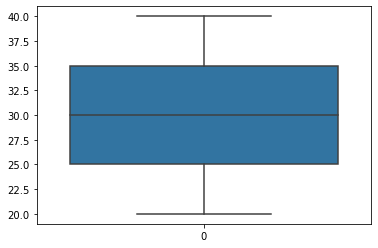

In [2]:
'''
描绘一个简单的箱线图
!pip install seaborn
'''
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = np.random.rand(50000) * 20 + 20
sns.boxplot(data = data)

In [ ]:
'''
使用PyOD库生成toy exmpale并调用HBOS
'''

In [4]:
from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [6]:
ct = 0.1
n_train = 7000
n_test = 3000

X_train, y_train, X_test, y_test = generate_data(
    n_train = n_train,
    n_test = n_test,
    contamination = ct
)

clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

# get the prediction on the test data
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [7]:
print("\nOn Traning Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Traning Data:
HBOS ROC:0.9971, precision @ rank n:1.0

On Test Data:
HBOS ROC:0.9987, precision @ rank n:1.0


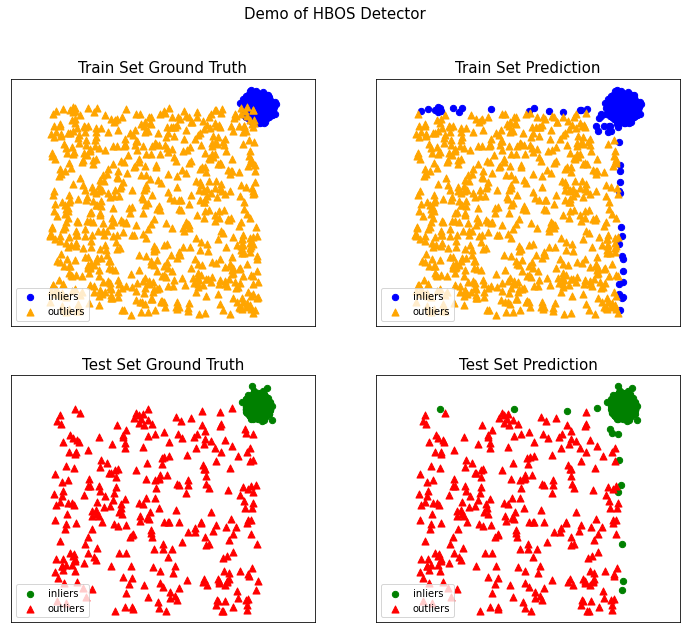

In [8]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure = True, save_figure = False)


On Traning Data:
HBOS ROC:0.9981, precision @ rank n:1.0

On Test Data:
HBOS ROC:0.9993, precision @ rank n:1.0


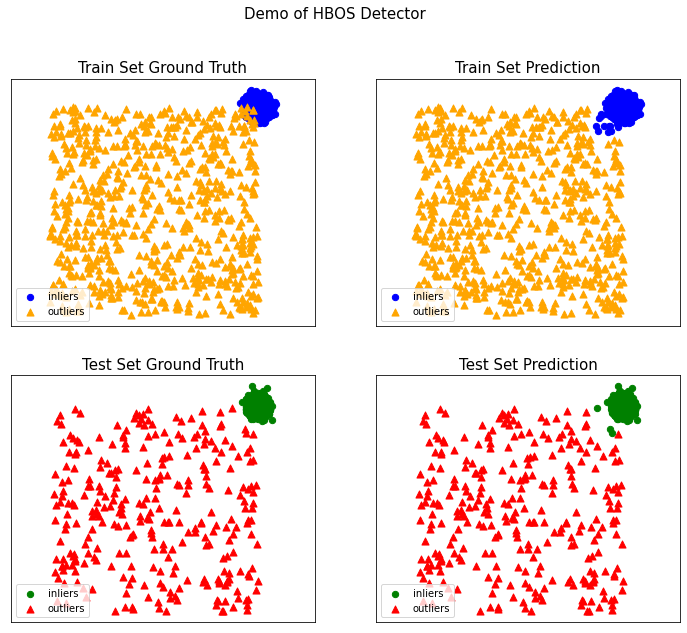

In [9]:
'''
调参提高准确率
'''
clf_name = 'HBOS'
clf = HBOS(alpha = 0.01)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

# get the prediction on the test data
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

print("\nOn Traning Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure = True, save_figure = False)